# Previsão de notas dos alunos
Muitos alunos de pós-graduação têm dificuldade em obter boas notas porque não recebem muito apoio nos cursos superiores em comparação com o apoio que os alunos recebem nas escolas. Alguns alunos precisam de muita atenção dos instrutores para que obtenham boas notas, sem isso, o estado emocional do aluno pode ser prejudicial para a sua carreira a longo prazo.

**O objetivo desse projeto é, através do aprendizado de máquina, prever as notas dos alunos para que os instrutores possam ajudar os alunos a se prepararem para tópicos em que as notas dos alunos foram previstas baixas.**  



https://www.kaggle.com/code/ramontanoeiro/student-performance/notebook

# #1 - Análise explotarória dos dados

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
path_datasets = '/content/drive/MyDrive/Machine Learning e Data Science com Python/Projeto - Nota dos Alunos/'

In [ ]:
pd.set_option('max_columns', 33)
pd.set_option('max_rows', 150)
df = pd.read_csv(path_datasets+'student-mat.csv')
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,course,other,1,2,2,no,yes,yes,no,yes,yes,no,no,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,course,mother,2,1,0,no,no,no,no,no,yes,yes,no,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,course,other,1,1,3,no,no,no,no,no,yes,no,no,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,course,mother,3,1,0,no,no,no,no,no,yes,yes,no,4,4,1,3,4,5,0,11,12,10


In [ ]:
features_num = list(df.select_dtypes(include=['int64']).columns)
features_cat = list(df.select_dtypes(include=['object']).columns)

## Atributos do conjunto de dados
Atributos para os conjuntos de dados student-mat.csv (curso de matemática)
- **school**: escola do aluno (binário: "GP" - Gabriel Pereira ou "MS" - Mousinho da Silveira)
- **sex**: sexo do aluno (binário: "F" - feminino ou "M" - masculino)
- **age**: idade do aluno (numérico: de 15 a 22)
- **address**: endereço residencial do aluno (binário: "U" - urbano ou "R" - rural)
- **famsize**: tamanho da família (binário: "LE3" - menor ou igual a 3 ou "GT3" - maior que 3)
- **Pstatus**: estado de coabitação dos pais (binário: "T" - morando juntos ou "A" - separados)
- **Medu**: escolaridade da mãe (numérico: 0 - nenhuma, 1 - ensino fundamental (4º ano), 2 - 5º ao 9º ano, 3 - ensino médio ou 4 - ensino superior)
- **Fedu**: escolaridade do pai (numérico: 0 - nenhuma, 1 - ensino fundamental (4º ano), 2 - 5º ao 9º ano, 3 - ensino médio ou 4 - ensino superior)
- **Mjob**: trabalho da mãe (nominal: "professor", "saúde" relacionado aos cuidados, "serviços" civis (por exemplo, administrativo ou policial), "at_home" ou "outros")
- **Fjob**: trabalho do pai (nominal: "professor", "saúde" relacionado aos cuidados, "serviços" civis (por exemplo, administrativo ou policial), "at_home" ou "outros")
- **reason**: razão para escolher esta escola (nominal: perto de "casa", escola "reputação", preferência "curso" ou "outro")
- **guardian**: tutor do aluno (nominal: "mãe", "pai" ou "outro")
- **traveltime**: tempo de viagem casa-escola (numérico: 1 - <15 min., 2 - 15 a 30 min., 3 - 30 min. a 1 hora, ou 4 - >1 hora)
- **studytime**: tempo de estudo semanal (numérico: 1 - <2 horas, 2 - 2 a 5 horas, 3 - 5 a 10 horas, ou 4 - >10 horas)
- **failures**: número de reprovações de classes anteriores (numérico: n se 1<=n<3, senão 4)
- **schoolsup**: apoio educacional extra (binário: sim ou não)
- **famsup**: apoio educacional familiar (binário: sim ou não)
- **paid**: aulas extras pagas dentro da disciplina do curso (binário: sim ou não)
- **activities**: atividades extracurriculares (binário: sim ou não)
- **nursery**: frequentou creche (binário: sim ou não)
- **higher**: quer fazer o ensino superior (binário: sim ou não)
- **internet**: acesso à Internet em casa (binário: sim ou não)
- **romantic**: está em um relacionamento romântico (binário: sim ou não)
- **famrel**: qualidade das relações familiares (numérico: de 1 - muito ruim a 5 - excelente)
- **freetime**: tempo livre depois da escola (numérico: de 1 - muito baixo a 5 - muito alto)
- **goout**: sair com amigos (numérico: de 1 - muito baixo a 5 - muito alto)
- **Dalc**: consumo de álcool (numérico: de 1 - muito baixo a 5 - muito alto)
- **Walc**: consumo de álcool no fim de semana (numérico: de 1 - muito baixo a 5 - muito alto)
- **health**: estado de saúde atual (numérico: de 1 - muito ruim a 5 - muito bom)
- **absences**: número de faltas escolares (numérico: de 0 a 93)
- **G1**: nota do primeiro período (numérico: de 0 a 20)
- **G2**: nota do segundo período (numérico: de 0 a 20)
- **G3: nota final (numérica: de 0 a 20)**
 


## Análise geral da base de dados

### Descrição do conjunto de dados

In [ ]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


### Verificar quantidade de dados nulos
O dataset não possui registros nulos

In [ ]:
df.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

#### Distribuição dos dados
As features de nota possuem uma distribuição semelhante à distribuição normal. As demais não.

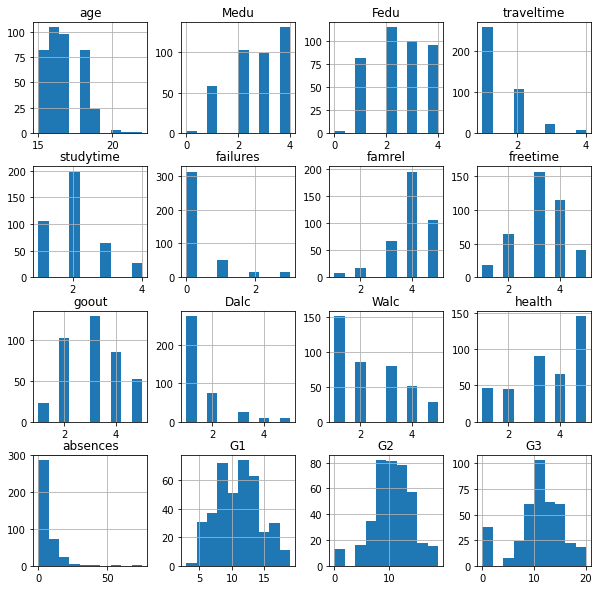

In [ ]:
df[features_num].hist(figsize = (10, 10));

### Verificar outliers

#### Nota dos alunos
- A média das notas dos alunos é em média 11 pontos nas três avaliações.
- Na ultima avaliação (G3) há vários alunos que tiraram nota muito baixa, será por desistência?
- Em contrapartida, na última avaliação (G3) os alunos tendem a tirar notas melhores.

In [ ]:
sns.set_palette('crest')
'https://seaborn.pydata.org/tutorial/color_palettes.html'

'https://seaborn.pydata.org/tutorial/color_palettes.html'

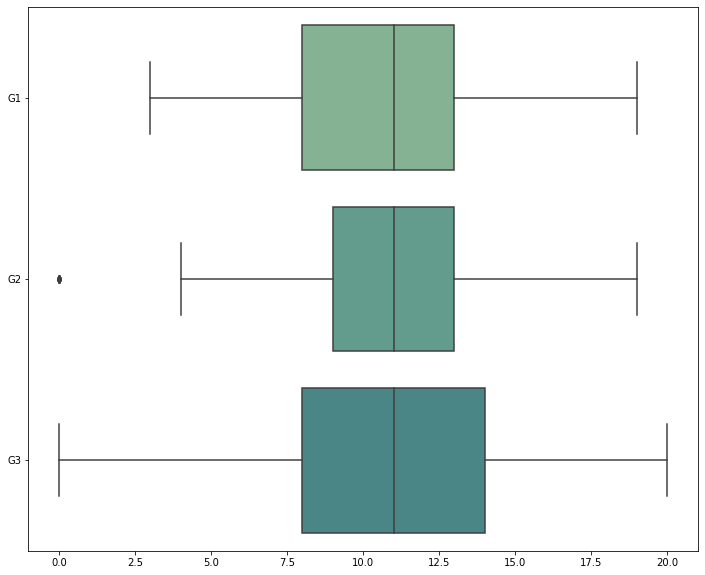

In [ ]:
plt.figure(figsize = (12, 10))
ax = sns.boxplot(orient = 'h', data = df[['G1', 'G2', 'G3']])

#### Número de falta dos alunos
A vantagem do uso do ViolinPlot é que, além das informações que o boxplot já traz consigo, existe a exibição da densidade dos dados.
- Os alunos faltam cerca de 5x por ano
- Os mais faltantes chegam a ter cerca de 21 a 30 faltas, podendo chegar até 75

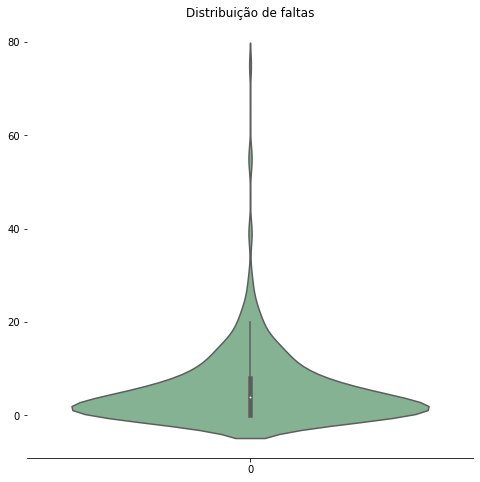

In [ ]:
plt.figure(figsize = (8, 8))
plt.title('Distribuição de faltas')
sns.violinplot(data =  df['absences'])
sns.despine(left=True);

### Verificar quantidade de valores distintos dos atributos categóricos

In [ ]:
for col in features_cat:
  print(f'{col}:\t {len( np.unique(df[col]) )} valores distintos')

school:	 2 valores distintos
sex:	 2 valores distintos
address:	 2 valores distintos
famsize:	 2 valores distintos
Pstatus:	 2 valores distintos
Mjob:	 5 valores distintos
Fjob:	 5 valores distintos
reason:	 4 valores distintos
guardian:	 3 valores distintos
schoolsup:	 2 valores distintos
famsup:	 2 valores distintos
paid:	 2 valores distintos
activities:	 2 valores distintos
nursery:	 2 valores distintos
higher:	 2 valores distintos
internet:	 2 valores distintos
romantic:	 2 valores distintos


### Verificar correlação das variáveis numéricas
- Há uma correlação considerável entre a escolaridade do pai e da mãe do aluno
- As notas dos alunos possui um grau de relacionamento entre elas.
- Há uma correlação fraca entre o costume de sair com os amigos e beber no fim de semana.

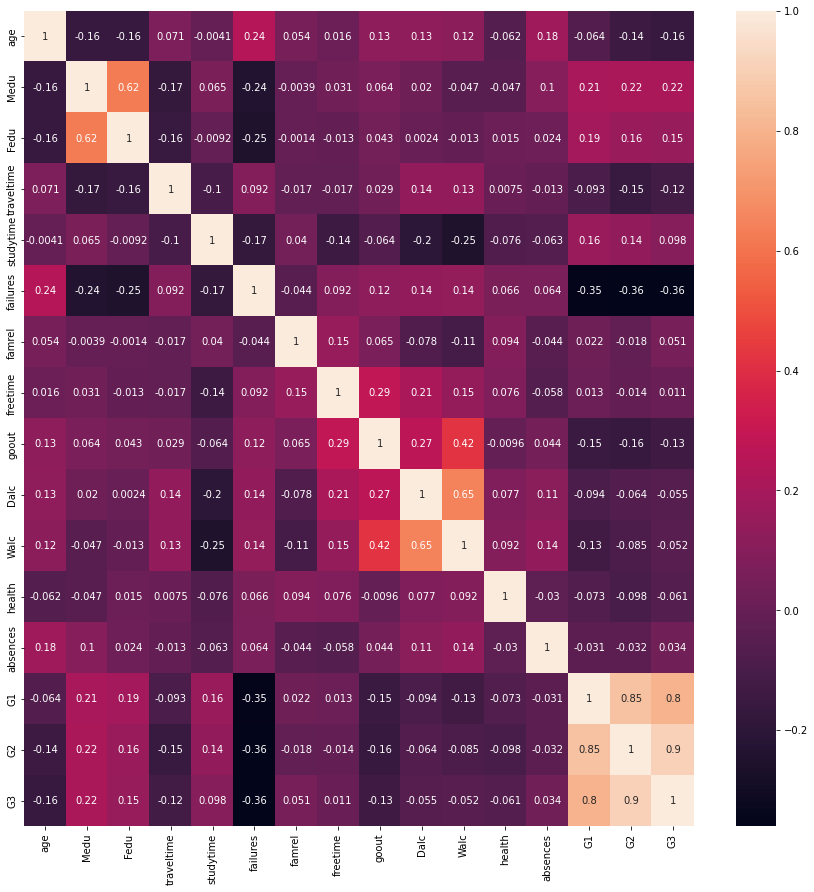

In [ ]:
plt.figure(figsize = (15, 15))
sns.heatmap(df.corr(), annot = True);

### Verificar multicolinearidade
A multicolinearidade ocorre quando o modelo inclui vários fatores correlacionados não apenas à sua variável de resposta, mas também uns aos outros. Em outras palavras, resulta quando você tem fatores que são, de certa forma, um pouco redundantes.  

O problema de se usar variáveis preditoras colineares na regressão é que elas explicam grande parte da mesma variância da variável de resultado. Isso reduz a significância estatística destas variáveis, nos levando a retirá-las quando na realidade elas podem ser significativas.  

Vamos medir a multicolinearidade com o  Variance Inflation factor (VIF). O VIF mede a razão entre a variância total do modelo (com todas variáveis) e a variância de um modelo que só tem aquela variável.  

- VIF = 1; não há multicolinearidade entre os fatores
- VIF > 1; preditoras podem estar moderadamente correlacionadas
- 5<= VIF <= 10; alta correlação
- VIF > 10; os coeficientes de regressão estão mal estimados devido à multicolinearidade 

*fontes:   
https://psicometriaonline.com.br/o-que-e-multicolinearidade/  
https://acervolima.com/detectando-multicolinearidade-com-vif-python/*

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

A multicolinearidade é um pouco mais difícil de ser compreendida em variáveis categóricas, por isso, iremos analisar as variáveis numéricas.
- Os atributos **age**, **famrel**, **G1** e **G2** possui uma multicolinearidade muito alta.
- Os atributos **Medu**, **Fedu**, **freetime** **goout** apresentam uma multicolinearidade alta.

In [ ]:
X_columns = features_num[:-1]

vif = pd.DataFrame()
vif['feature'] = X_columns
vif["VIF"] = [variance_inflation_factor(df[X_columns].values, i) for i in range(len(X_columns))]
vif

,feature,VIF
0,age,57.983152
1,Medu,12.746160
2,Fedu,10.824003
3,traveltime,5.623976
4,studytime,7.721662
5,failures,1.570289
6,famrel,21.321333
7,freetime,13.448021
8,goout,12.251354
9,Dalc,6.801682


In [ ]:
def df_detail(df, info, columns):
  df_data = []
  df_info = info

  columns_dict = {}
  for c in columns:
    columns_dict[c] = []
  df_new = pd.DataFrame(columns_dict)

  for c1, c2 in df[columns].sort_values(by = [columns[0]]).values:
    df_data.append((df_info[c1], c2))

  df_new[columns] = df_data
  return df_new

In [ ]:
# Criando novos atributos para análise
GTotalClass = []

df['GTotal'] = df['G1'] + df['G2'] + df['G3']
for v in df['GTotal'].values:
  GTotalClass.append( '0..10' if v <= 10 else '11..20' if v <= 20 else '21..30' ) 

GTotalClass
df['GTotalClass'] = GTotalClass
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,...,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,GTotal,GTotalClass
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,...,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6,17,11..20
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,...,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6,16,11..20
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,...,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10,25,21..30
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,...,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15,44,21..30
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,...,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10,26,21..30


## Análise das informações pessoais dos alunos
	school
	sex
	age
	address
	reason
	failures
	guardian
	higher
	internet	
	health
	absences

In [ ]:
sns.set_palette('Set2')

Os conjunto de dados são predominantemente da Escola Gabriel Pereira (88%)

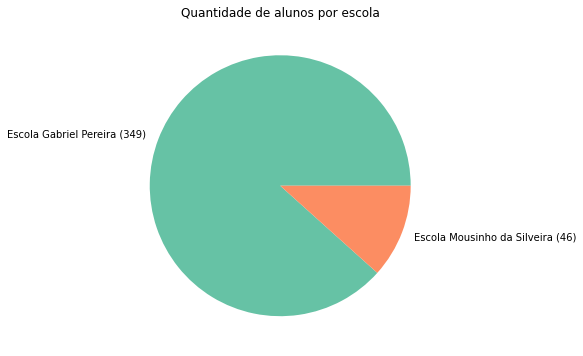

In [ ]:
school_data = ( df[df['school'] == 'GP'].shape[0], df[df['school'] == 'MS'].shape[0] )
school_labels = (f'Escola Gabriel Pereira ({school_data[0]})', f'Escola Mousinho da Silveira ({school_data[1]})')

plt.figure(figsize = (12, 6))
patches, texts = plt.pie(school_data, labels=school_labels)

plt.title('Quantidade de alunos por escola')
plt.show()

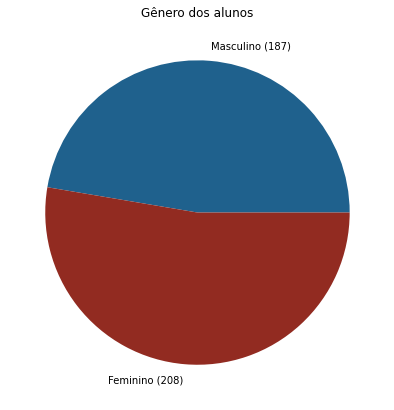

In [ ]:
sex_data = ( df[df['sex'] == 'M'].shape[0], df[df['sex'] == 'F'].shape[0] )
sex_labels = (f'Masculino ({sex_data[0]})', f'Feminino ({sex_data[1]})')

plt.figure(figsize = (7, 7))
patches, texts = plt.pie(sex_data, labels=sex_labels, colors = ['#1F618D', '#922B21'])

plt.title('Gênero dos alunos')
plt.show()

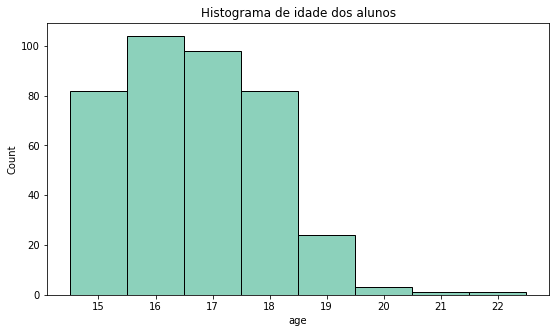

In [ ]:
plt.figure(figsize = (9, 5))
plt.title('Histograma de idade dos alunos')
sns.histplot(data=df, x="age", discrete = True);

Cerca de 82% dos alunos da escola Gabriel Pereira moram na área urbana. Além disso, podemos notar que a Escola Mousinho da Silveira tem uma ênfase em alunos da área rural (45,6%).

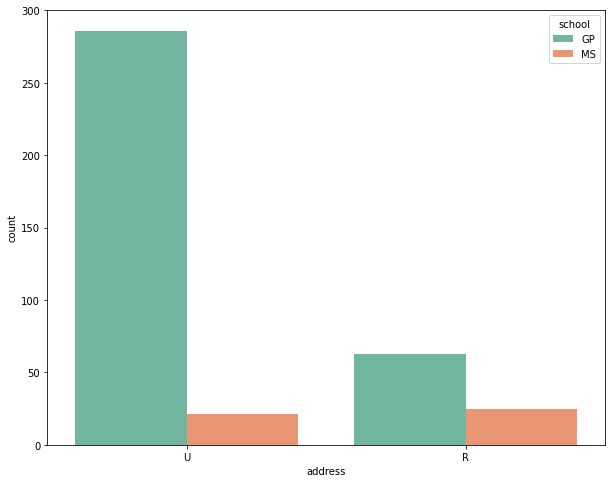

In [ ]:
plt.figure(figsize = (10, 8))
ax = sns.countplot(x="address", hue="school", data=df);

É possível notar que a nota das avaliações dos alunos tendem a piorar conforme eles vão obtendo reprovações.

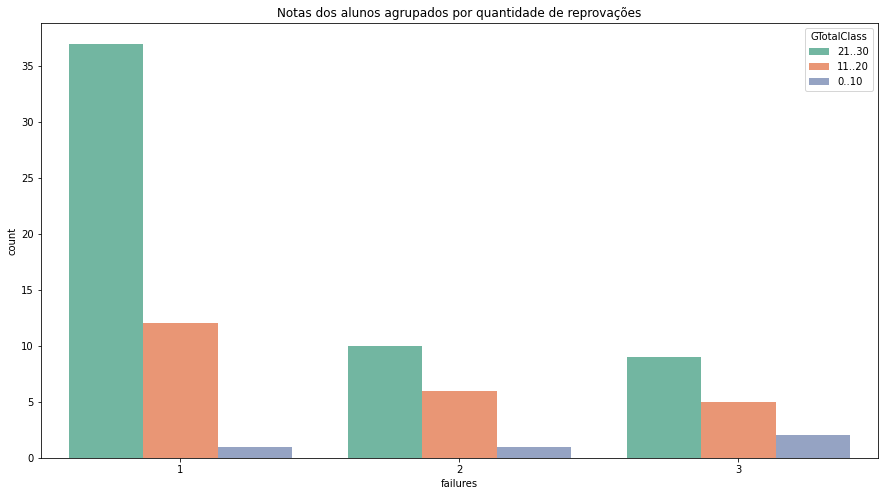

In [ ]:
plt.figure(figsize = (15, 8))
plt.title('Notas dos alunos agrupados por quantidade de reprovações')
ax = sns.countplot(x="failures", hue="GTotalClass", data=df[df['failures'] != 0]);

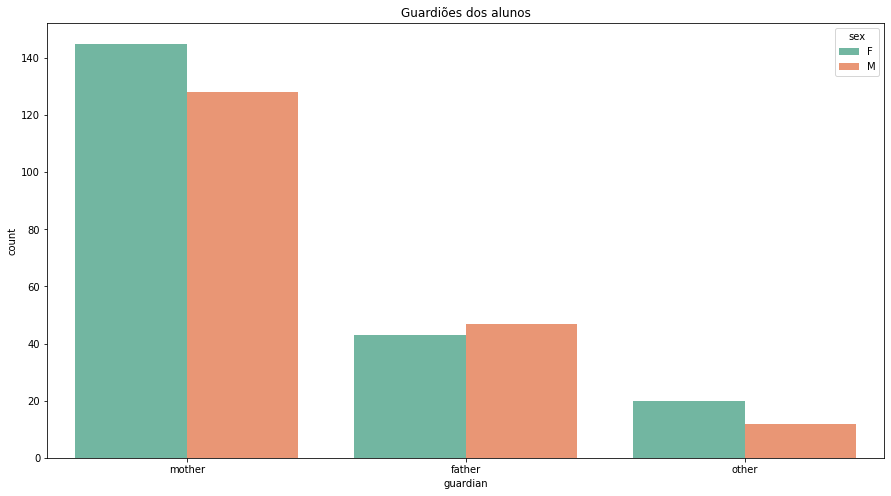

In [ ]:
plt.figure(figsize = (15, 8))
plt.title('Guardiões dos alunos')
ax = sns.countplot(x="guardian", hue="sex", data=df);

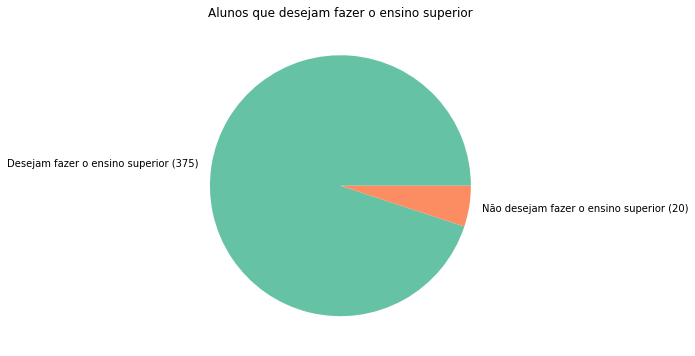

In [ ]:
higher_data = ( df[df['higher'] == 'yes'].shape[0], df[df['higher'] == 'no'].shape[0] )
higher_labels = (f'Desejam fazer o ensino superior ({higher_data[0]})', f'Não desejam fazer o ensino superior ({higher_data[1]})')

plt.figure(figsize = (12, 6))
patches, texts = plt.pie(higher_data, labels=higher_labels)

plt.title('Alunos que desejam fazer o ensino superior')
plt.show()

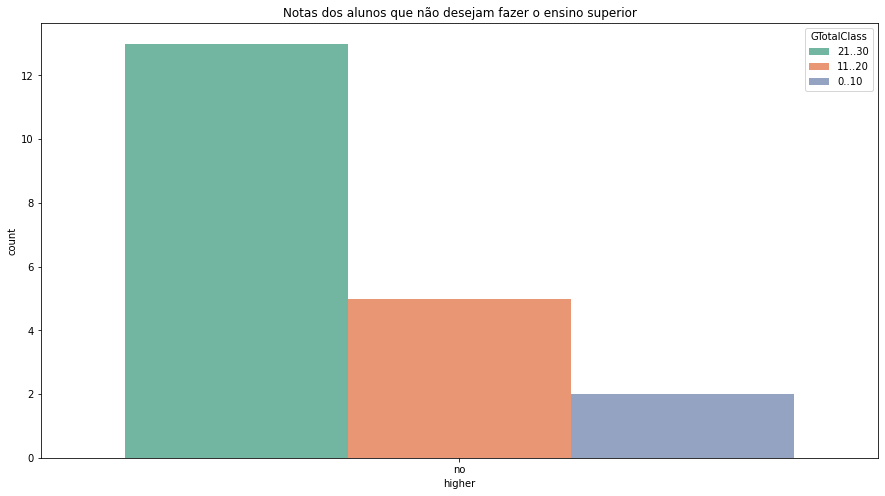

In [ ]:
plt.figure(figsize = (15, 8))
plt.title('Notas dos alunos que não desejam fazer o ensino superior')
ax = sns.countplot(x="higher", hue="GTotalClass", data=df[df['higher'] == 'no']);

1 a cada 3 alunos da zona rural não têm acesso a internet

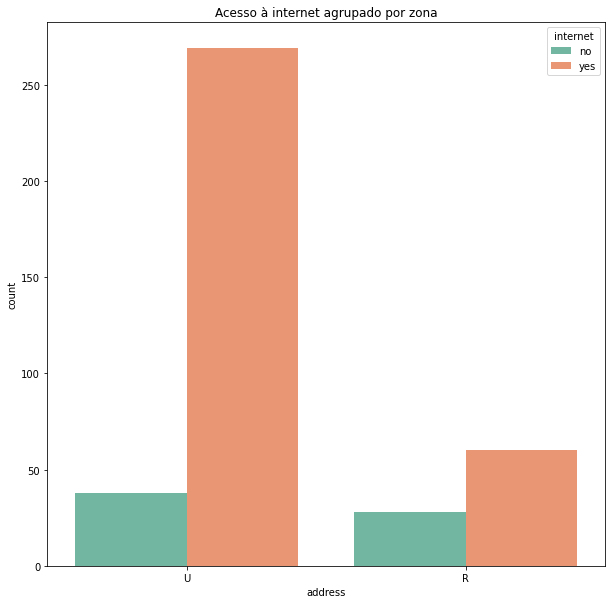

In [ ]:
plt.figure(figsize = (10, 10))
plt.title('Acesso à internet agrupado por zona')
ax = sns.countplot(x="address", hue="internet", data=df);

Cerca de 23% dos alunos estão com a condição de saúde ruim ou muito ruim.

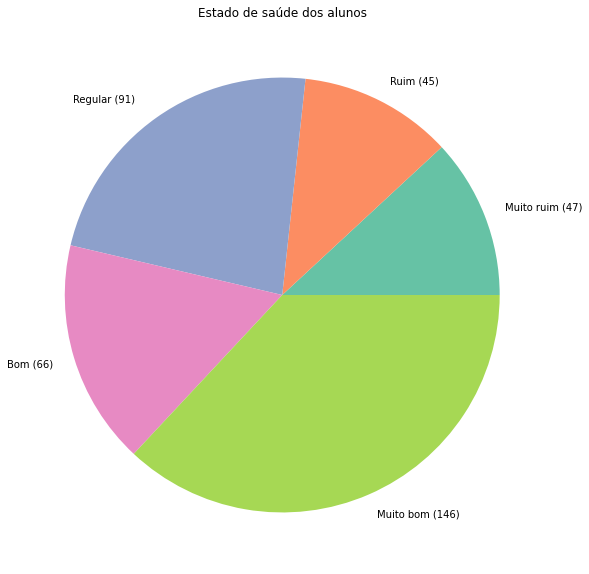

In [ ]:
health_data = ( df[df['health'] == 1].shape[0], df[df['health'] == 2].shape[0],
                df[df['health'] == 3].shape[0], df[df['health'] == 4].shape[0],
                df[df['health'] == 5].shape[0]  )
health_labels = (f'Muito ruim ({health_data[0]})', f'Ruim ({health_data[1]})'
               , f'Regular ({health_data[2]})   ', f'Bom ({health_data[3]})'
               , f'Muito bom ({health_data[4]})')

plt.figure(figsize = (10, 10))
patches, texts = plt.pie(health_data, labels=health_labels)

plt.title('Estado de saúde dos alunos')
plt.show()

## Análise familiar do aluno
	famsize
	Pstatus
	Medu
	Fedu
	Mjob
	Fjob

In [ ]:
sns.set_palette('icefire')

Aproximadamente 50% dos alunos que têm 3 ou menos membros na família não possuem suporte familiar na educação. 

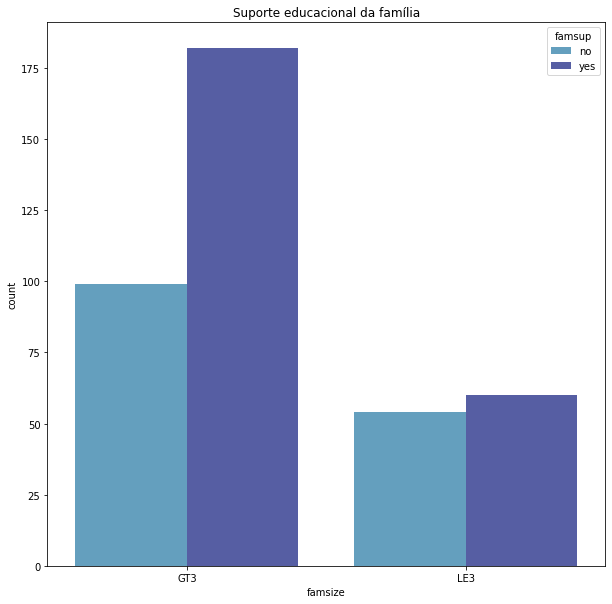

In [ ]:
plt.figure(figsize = (10, 10))
plt.title('Suporte educacional da família')
ax = sns.countplot(x="famsize", hue="famsup", data=df);

92,5% dos alunos com mais de 3 parentes na família cohabitam juntos na mesma casa

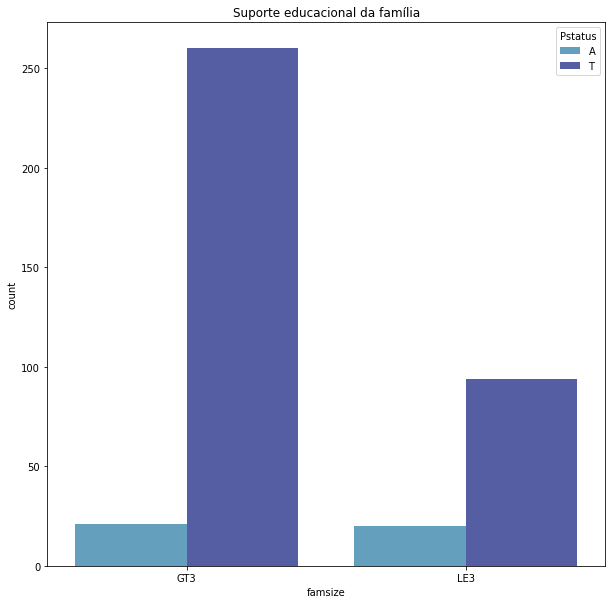

In [ ]:
plt.figure(figsize = (10, 10))
plt.title('Suporte educacional da família')
ax = sns.countplot(x="famsize", hue="Pstatus", data=df);

In [ ]:
Pedu_data = []
Pedu_dict = {0: 'none', 1: 'primary education (4th grade)', 2: '5th to 9th grade', 3: 'secondary education', 4: 'higher education'}
for m, f in df[['Medu', 'Fedu']].values:
  Pedu_data.append(['Mother', Pedu_dict[m]])
  Pedu_data.append(['Father', Pedu_dict[f]])

df_Pedu = pd.DataFrame(Pedu_data, columns = ['parent','edu'])
df_Pedu.head()

,parent,edu
0,Mother,higher education
1,Father,higher education
2,Mother,primary education (4th grade)
3,Father,primary education (4th grade)
4,Mother,primary education (4th grade)


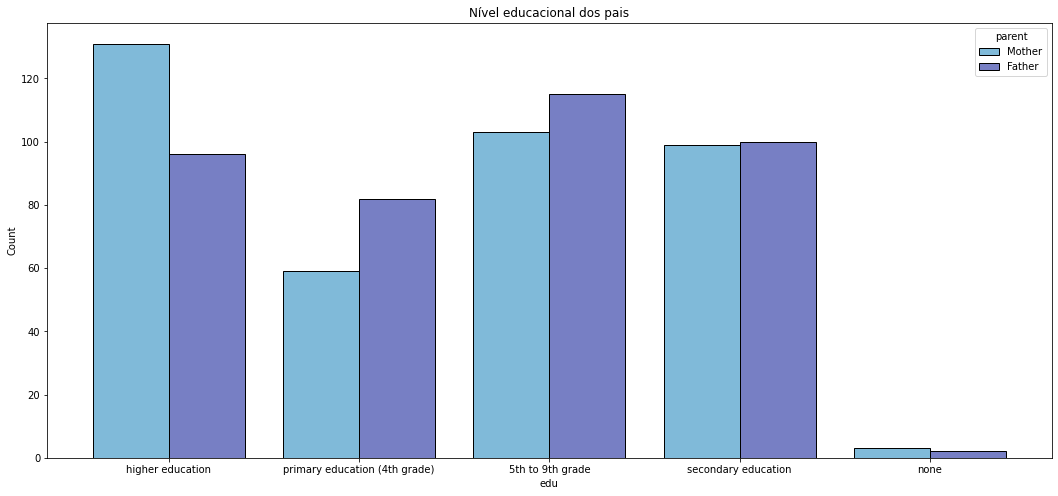

In [ ]:
plt.figure(figsize = (18, 8))
plt.title('Nível educacional dos pais')
sns.histplot(data=df_Pedu, x="edu", hue="parent", multiple="dodge", shrink=.8);

In [ ]:
Pedu_1 = []
Pedu_4 = []
for m, f in df[['Medu', 'Fedu']].values:
  if 1 in (m, f):
    Pedu_1.append(1)
  else:
    Pedu_1.append(0)
  if 4 in (m, f):
    Pedu_4.append(1)
  else:
    Pedu_4.append(0)
df['Pedu_1'] = Pedu_1
df['Pedu_4'] = Pedu_4
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,GTotal,GTotalClass,Pedu_1,Pedu_4
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,...,no,no,4,3,4,1,1,3,6,5,6,6,17,11..20,0,1
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,...,yes,no,5,3,3,1,1,3,4,5,5,6,16,11..20,1,0
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,...,yes,no,4,3,2,2,3,3,10,7,8,10,25,21..30,1,0
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,...,yes,yes,3,2,2,1,1,5,2,15,14,15,44,21..30,0,1
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,...,no,no,4,3,2,1,2,5,4,6,10,10,26,21..30,0,0


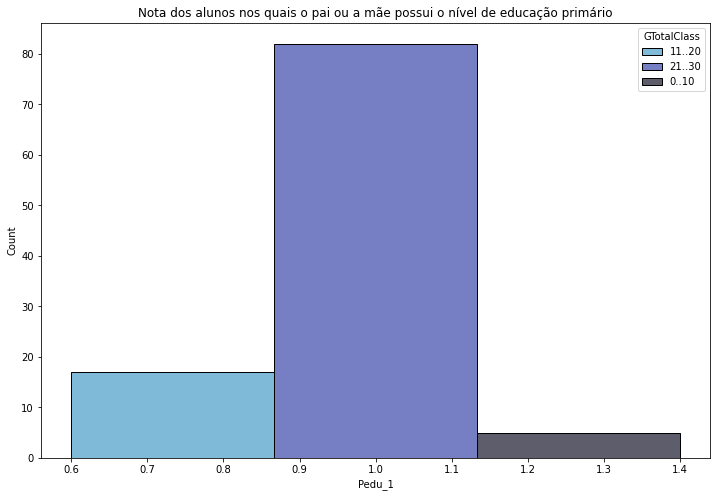

In [ ]:
plt.figure(figsize = (12, 8))
plt.title('Nota dos alunos nos quais o pai ou a mãe possui o nível de educação primário')
sns.histplot(data=df[df['Pedu_1'] == 1], x="Pedu_1", hue="GTotalClass", multiple="dodge", shrink=.8);

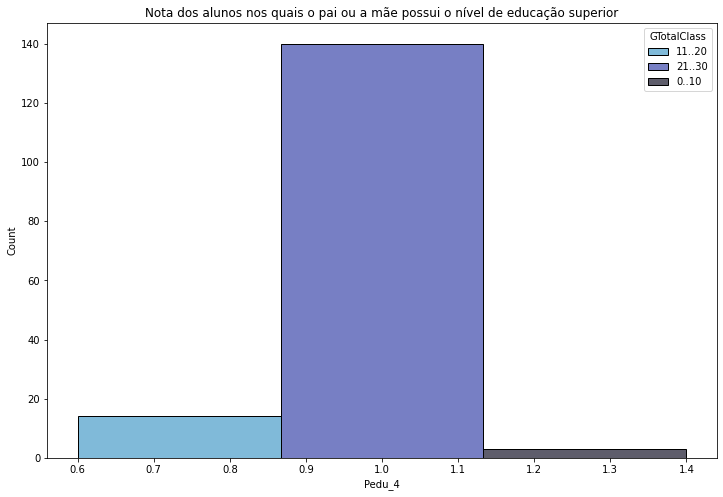

In [ ]:
plt.figure(figsize = (12, 8))
plt.title('Nota dos alunos nos quais o pai ou a mãe possui o nível de educação superior')
sns.histplot(data=df[df['Pedu_4'] == 1], x="Pedu_4", hue="GTotalClass", multiple="dodge", shrink=.8);

## Análise das informações de suporte educacional do aluno
	traveltime
	studytime
	schoolsup
	famsup
	paid
	activities
	nursery

In [ ]:
sns.set_palette('Pastel1')

In [ ]:
df_travel = df_detail(df, {1: '<15 min', 2: '15 to 30 min.', 3: '30 min. to 1 hour', 4: '>1 hour'}, ['traveltime', 'address']) 
df_travel.head()

,traveltime,address
0,<15 min,U
1,<15 min,R
2,<15 min,U
3,<15 min,U
4,<15 min,U


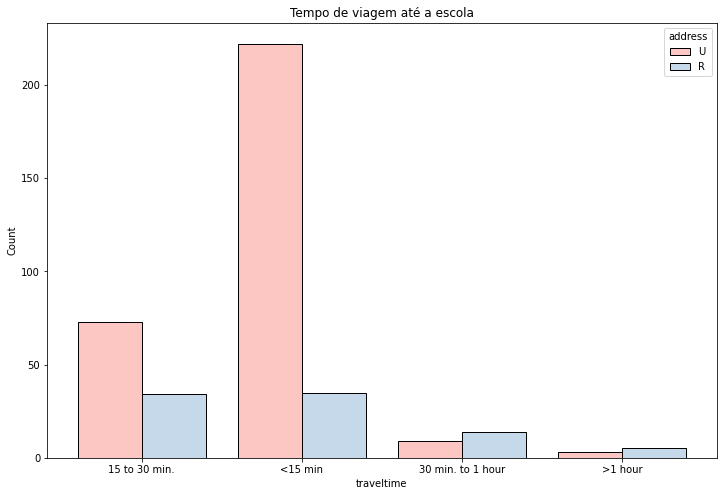

In [ ]:
plt.figure(figsize = (12, 8))
plt.title('Tempo de viagem até a escola')
sns.histplot(data=df_travel, x="traveltime", hue="address", multiple="dodge", shrink=.8);

In [ ]:
df_studytime = df_detail(df, {1: '<2 hours', 2: '2 to 5 hour', 3: '5 to 10 hours', 4: '>10 hours'}, ['studytime', 'GTotalClass']) 
df_studytime.head()

,studytime,GTotalClass
0,<2 hours,21..30
1,<2 hours,11..20
2,<2 hours,21..30
3,<2 hours,0..10
4,<2 hours,21..30


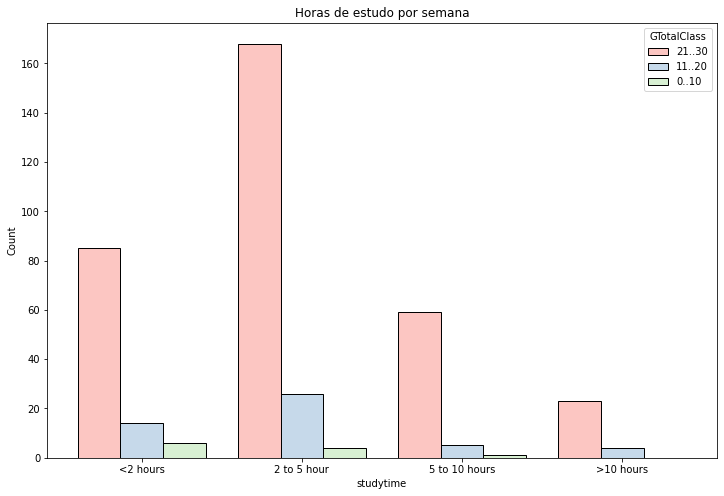

In [ ]:
plt.figure(figsize = (12, 8))
plt.title('Horas de estudo por semana')
sns.histplot(data=df_studytime, x="studytime", hue="GTotalClass", multiple="dodge", shrink=.8);

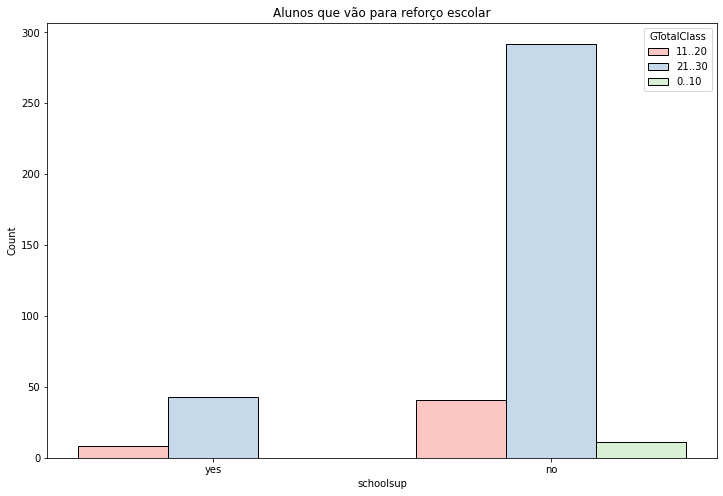

In [ ]:
plt.figure(figsize = (12, 8))
plt.title('Alunos que vão para reforço escolar')
sns.histplot(data=df, x="schoolsup", hue="GTotalClass", multiple="dodge", shrink=.8);

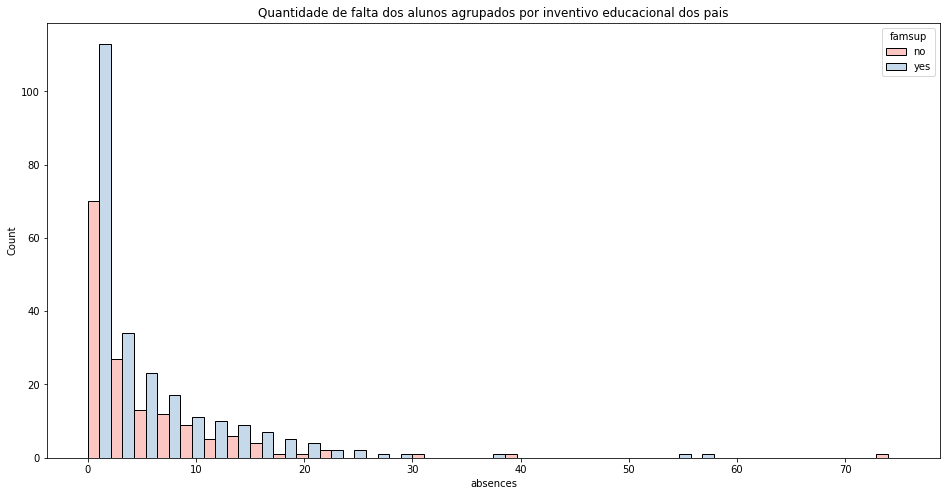

In [ ]:
plt.figure(figsize = (16, 8))
plt.title('Quantidade de falta dos alunos agrupados por inventivo educacional dos pais')
sns.histplot(data=df, x="absences", hue="famsup", multiple="dodge");

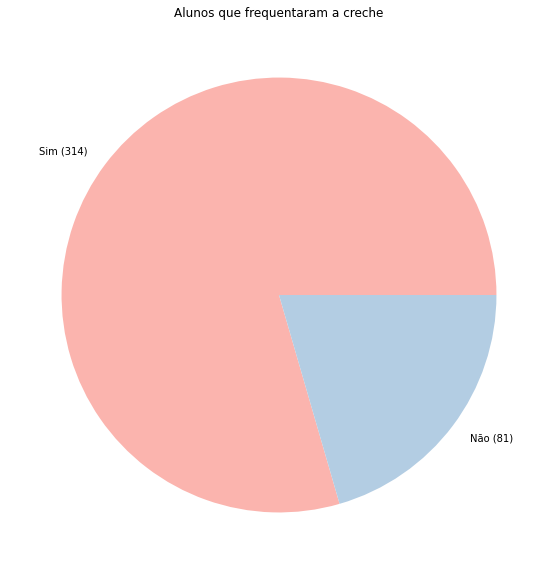

In [ ]:
nursery_data = ( df[df['nursery'] == 'yes'].shape[0], df[df['nursery'] == 'no'].shape[0])
nursery_labels = (f'Sim ({nursery_data[0]})', f'Não ({nursery_data[1]})')

plt.figure(figsize = (10, 10))
patches, texts = plt.pie(nursery_data, labels=nursery_labels)

plt.title('Alunos que frequentaram a creche')
plt.show()

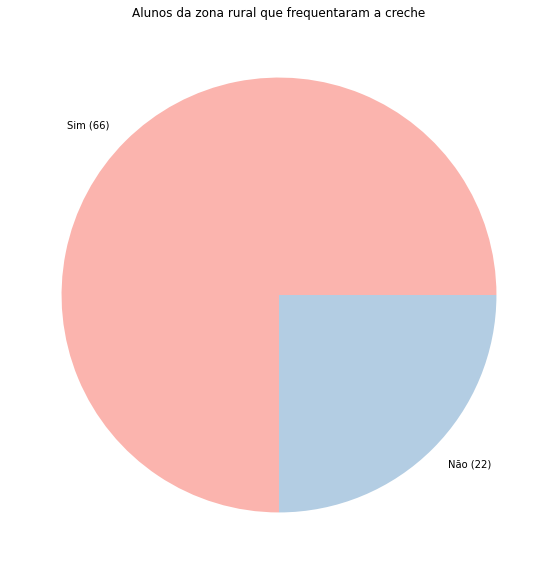

In [ ]:
df_r = df[df['address'] == 'R']
nursery_data = ( df_r[df_r['nursery'] == 'yes'].shape[0], df_r[df_r['nursery'] == 'no'].shape[0])
nursery_labels = (f'Sim ({nursery_data[0]})', f'Não ({nursery_data[1]})')

plt.figure(figsize = (10, 10))
patches, texts = plt.pie(nursery_data, labels=nursery_labels)

plt.title('Alunos da zona rural que frequentaram a creche')
plt.show()

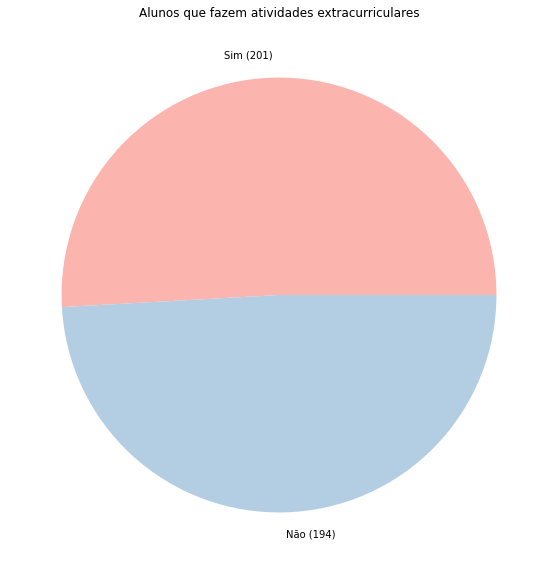

In [ ]:
activities_data = ( df[df['activities'] == 'yes'].shape[0], df[df['activities'] == 'no'].shape[0])
activities_labels = (f'Sim ({activities_data[0]})', f'Não ({activities_data[1]})')

plt.figure(figsize = (10, 10))
patches, texts = plt.pie(activities_data, labels=activities_labels)

plt.title('Alunos que fazem atividades extracurriculares')
plt.show()

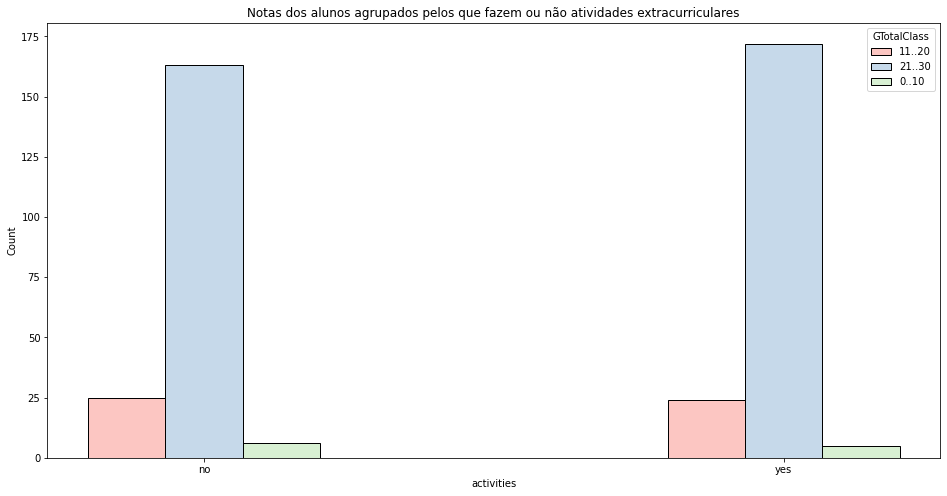

In [ ]:
plt.figure(figsize = (16, 8))
plt.title('Notas dos alunos agrupados pelos que fazem ou não atividades extracurriculares')
sns.histplot(data=df, x="activities", hue="GTotalClass", multiple="dodge", shrink=.4);

## Análise dos relacionamentos do aluno
	romantic
	famrel
	freetime
	goout
	Dalc
	Walc

In [ ]:
sns.set_palette('RdYlGn_r')

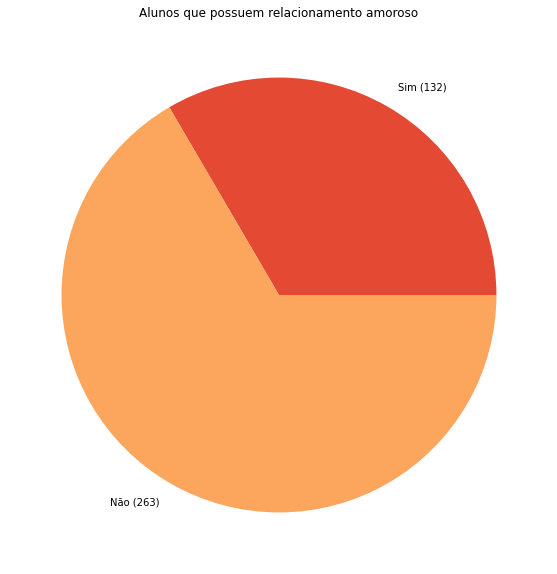

In [ ]:
romantic_data = ( df[df['romantic'] == 'yes'].shape[0], df[df['romantic'] == 'no'].shape[0])
romantic_labels = (f'Sim ({romantic_data[0]})', f'Não ({romantic_data[1]})')

plt.figure(figsize = (10, 10))
patches, texts = plt.pie(romantic_data, labels=romantic_labels)

plt.title('Alunos que possuem relacionamento amoroso')
plt.show()

In [ ]:
romantic_yes_mean, romantic_yes_std = df[ df['romantic']  == 'yes' ]['absences'].mean(), df[ df['romantic']  == 'yes' ]['absences'].std()
romantic_no_mean, romantic_no_std   = df[ df['romantic']  == 'no' ]['absences'].mean(), df[ df['romantic']  == 'no' ]['absences'].std()

In [ ]:
print(f'Os alunos COM relacionamento amoroso faltam em média {int(romantic_yes_mean)}x (desvio padrão: {int(romantic_yes_std)}) às aulas')
print(f'Os alunos SEM relacionamento amoroso faltam em média {int(romantic_no_mean)}x (desvio padrão: {int(romantic_no_std)}) às aulas')

Os alunos COM relacionamento amoroso faltam em média 7x (desvio padrão: 10) às aulas
Os alunos SEM relacionamento amoroso faltam em média 4x (desvio padrão: 5) às aulas


In [ ]:
df_famrel = df_detail(df, {1: 'Muito Ruim', 2: 'Ruim', 3: 'Regular', 4: 'Bom', 5: 'Muito bom'}, ['famrel', 'GTotalClass']) 
df_famrel.head()

,famrel,GTotalClass
0,Muito Ruim,21..30
1,Muito Ruim,21..30
2,Muito Ruim,11..20
3,Muito Ruim,21..30
4,Muito Ruim,21..30


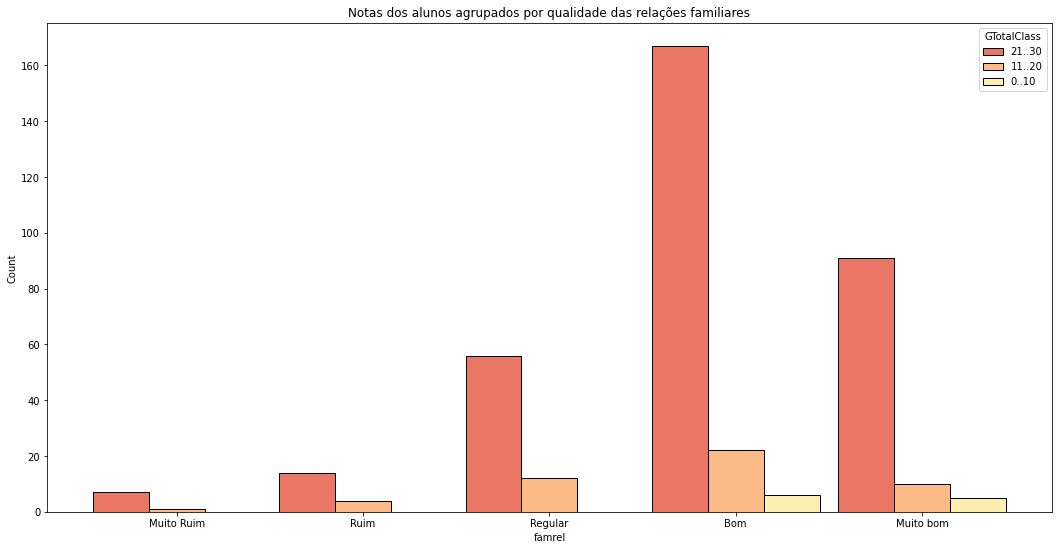

In [ ]:
plt.figure(figsize = (18, 9))
plt.title('Notas dos alunos agrupados por qualidade das relações familiares')
sns.histplot(data=df_famrel, x="famrel", hue="GTotalClass", multiple="dodge", shrink=.9);

In [ ]:
df_Walc = df_detail(df, {1: 'Muito baixo', 2: 'Baixo', 3: 'Regular', 4: 'Alto', 5: 'Muito alto'}, ['Walc', 'GTotalClass']) 
df_Walc.head()

,Walc,GTotalClass
0,Muito baixo,11..20
1,Muito baixo,21..30
2,Muito baixo,11..20
3,Muito baixo,21..30
4,Muito baixo,0..10


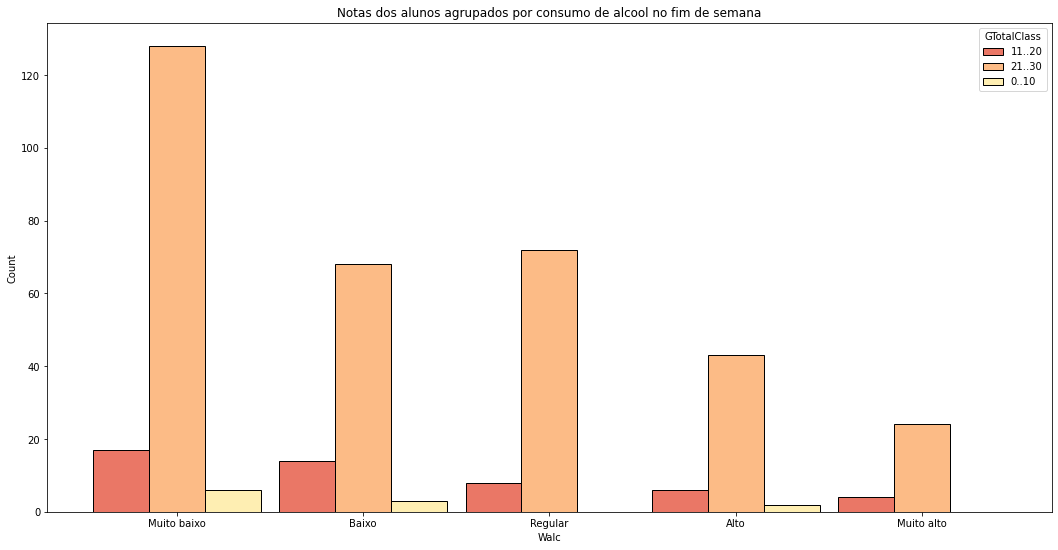

In [ ]:
plt.figure(figsize = (18, 9))
plt.title('Notas dos alunos agrupados por consumo de alcool no fim de semana')
sns.histplot(data=df_Walc, x="Walc", hue="GTotalClass", multiple="dodge", shrink=.9);

In [ ]:
df_Dalc = df_detail(df, {1: 'Muito baixo', 2: 'Baixo', 3: 'Regular', 4: 'Alto', 5: 'Muito alto'}, ['Dalc', 'GTotalClass']) 
df_Dalc.head()

,Dalc,GTotalClass
0,Muito baixo,11..20
1,Muito baixo,21..30
2,Muito baixo,21..30
3,Muito baixo,21..30
4,Muito baixo,21..30


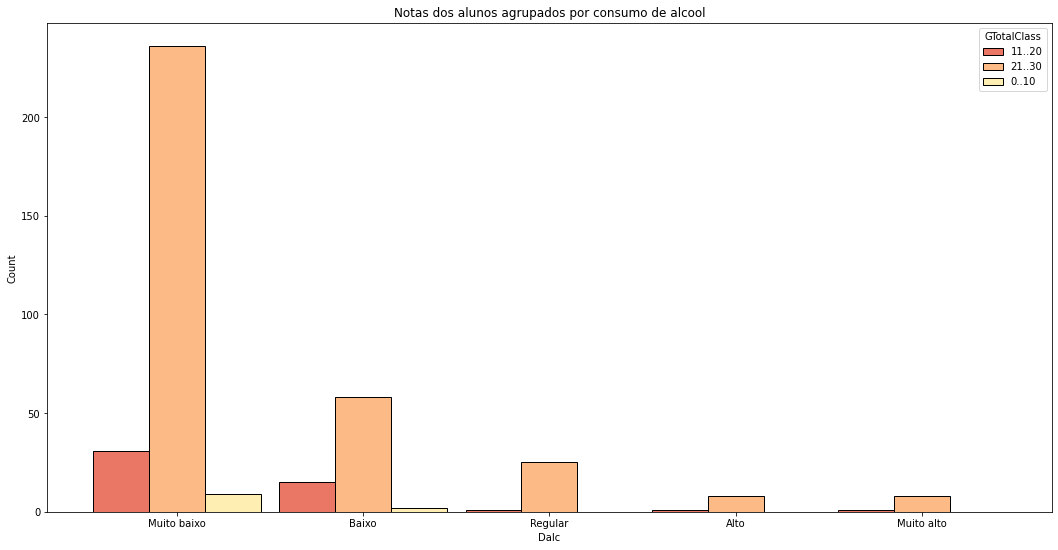

In [ ]:
plt.figure(figsize = (18, 9))
plt.title('Notas dos alunos agrupados por consumo de alcool')
sns.histplot(data=df_Dalc, x="Dalc", hue="GTotalClass", multiple="dodge", shrink=.9);